<a href="https://colab.research.google.com/github/HwayoungYoon/Lecture-Seminar/blob/master/DACON_tutorial_code_ipynb_190618_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 3.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({"id": "1u0Ajuxt8z3ebMdRGE5FQ7DBzhefcppAk"}) #이부분 수정하면 됩니당
download.GetContentFile("movies_test.csv")


In [0]:
download = drive.CreateFile({"id": "1JxJ5AGM4-aJ2kN4EX-njp4D1PmyYpfPZ"}) #이부분 수정하면 됩니당
download.GetContentFile("movies_train.csv")

In [0]:
import pandas as pd
import numpy as np

In [0]:
train_df = pd.read_csv("movies_train.csv")
test_df = pd.read_csv("movies_test.csv")

In [0]:
train_df.shape, test_df.shape

((600, 12), (243, 11))

In [0]:
test_df['box_off_num'] = None
df = pd.concat([train_df, test_df], axis = 0) # 두 데이터 Merge
df.isnull().sum() #결측값 확인
# dir_prev_bfnum의 경우 466개의 결측값이 존재하고
# box_off_num은 243는 Test data로 예측해야할 대상임.

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    466
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num       243
dtype: int64

#- ①	movies_train.csv
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터
- ②	movies_test.csv
관객수를 제외하고 movies_train과 동일
- ③	submission.csv
제출 파일의 형식


[Data fields]
①	movies_train.csv
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터 

- Column_name	Description
- 1 title : 영화의 제목
- 2 distributor : 배급사
- 3 genre : 장르
- 4 release_time : 개봉일
- 5 time : 상영시간(분)
- 6 screening_rat : 상영등급
- 7 director : 감독이름
- 8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- 9 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- 10 num_staff : 스텝수
- 11 num_actor : 주연배우수
- 12	box_off_num : 관객수


# 2 distributor : 배급사


In [0]:
import seaborn as sns

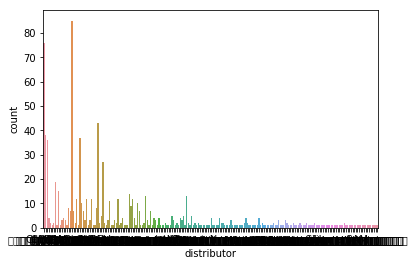

In [0]:
sns.countplot(df.distributor)

In [0]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [58.0 kB]
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelea

In [0]:
import konlpy

In [0]:
df.distributor.value_counts()

CJ 엔터테인먼트          85
롯데엔터테인먼트           76
(주)마운틴픽쳐스          43
(주)쇼박스             38
인디스토리              37
(주)NEW             36
골든타이드픽처스           27
(주) 케이알씨지          19
(주)키노아이            15
KT&G 상상마당          14
시네마달               13
어뮤즈                13
인디플러그              12
(주) 영화사조제          12
인벤트 디              12
영화사 진진             12
NEW                12
시너지                11
시네마 달              10
(주)팝엔터테인먼트         10
무비꼴라쥬               9
리틀빅픽처스              8
BoXoo 엔터테인먼트        8
CGV아트하우스            7
나이너스엔터테인먼트(주)       7
필라멘트 픽쳐스            7
스폰지                 7
시네마서비스              7
메가박스(주)플러스엠         5
싸이더스                5
                   ..
타임스토리               1
건시네마                1
노근리 프로덕션            1
고구마공작소              1
(주)이스트스카이필름         1
(주)피터팬픽쳐스           1
필마픽쳐스               1
(주)아이필름코퍼레이션        1
프로젝트 엠피             1
(주)씨타마운틴픽쳐스         1
프리비젼 엔터테인먼트         1
갑종필름                1
머스트 씨 무비            1
메가박스중앙(주)플러스엠       1
(주)콘텐츠 윙  

In [0]:
for i in df.distributor.tolist():
  if "NEW" in i :
    print(i)

(주)NEW
(주)NEW
NEW
(주)NEW
(주)NEW
(주)NEW
NEW
NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
NEW
(주)NEW
(주)NEW
NEW
NEW
(주)NEW
(주)NEW
NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
NEW
NEW
(주)NEW
(주)NEW
(주)NEW
(주)NEW
NEW
NEW
(주)NEW
(주)NEW


- Class 개수가 너무 많다. -> 묶을 수 있는 배급사끼리 묶어 보자. ex) (주)New, New는 하나로

In [0]:
import re
def preprocessing(text):
    # 개행문자 제거
    text = re.sub(r'\([^)]*\)', '', str(text).strip())
    return text

from konlpy.tag import Twitter
pos_tagger = Twitter()

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [0]:

df.distributor.apply(preprocessing).apply(lambda x: pos_tagger.morphs(x)[0]).value_counts()

CJ        92
롯데        77
NEW       48
마운틴       47
쇼박스       42
인디스토리     37
영화사       28
골든        27
시네마       25
케이        19
KT        17
키노아이      15
어뮤즈       13
인         12
리틀        12
인디        12
팝         11
시너지       11
CGV       10
무비         9
BoXoo      8
드림         8
싸이더스       7
나이         7
시네마서비스     7
씨          7
필라멘트       7
스폰지        7
마인         6
메가박스       6
          ..
아이         1
필름         1
인터         1
팜          1
새          1
사람과        1
스크린        1
와이드        1
노근리        1
이상우        1
이스트        1
루스         1
동국대학교      1
핑크         1
판          1
피터         1
전주         1
나우         1
스마일        1
루          1
미라클        1
필마픽쳐스      1
프로젝트       1
영희         1
굿픽처스       1
KBS        1
디마         1
영구아트무비     1
퍼스트        1
갑종         1
Name: distributor, Length: 158, dtype: int64

In [0]:
df.distributor = df.distributor.apply(preprocessing).apply(lambda x: pos_tagger.morphs(x)[0])
train_df.distributor = train_df.distributor.apply(preprocessing).apply(lambda x: pos_tagger.morphs(x)[0])
test_df.distributor = test_df.distributor.apply(preprocessing).apply(lambda x: pos_tagger.morphs(x)[0])

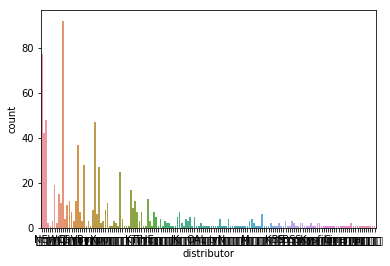

In [0]:
sns.countplot(df.distributor)

In [0]:
test_distributor = set(test_df.distributor.unique())
train_distributor = set(train_df.distributor.unique())
inter_distributor =  list(train_distributor.intersection(test_distributor))

target_distributor = []
for di in inter_distributor:
    if train_df[train_df.distributor == di]['box_off_num'].mean() > train_df['box_off_num'].mean():
        target_distributor.append(di)

In [0]:

len(target_distributor)

8

In [0]:


distributor_dict = dict((i,j) for i,j in zip(target_distributor, [i for i in range(len(target_distributor))]))
distributor_dict

{'CGV': 5,
 'CJ': 6,
 'NEW': 2,
 '롯데': 4,
 '쇼박스': 0,
 '시네마서비스': 3,
 '씨너스': 1,
 '이십': 7}

In [0]:
df.distributor = df.distributor.replace(distributor_dict).apply(lambda x : x if str(x).isdigit() else len(target_distributor)).astype("object")
train_df.distributor = train_df.distributor.replace(distributor_dict).apply(lambda x : x if str(x).isdigit() else len(target_distributor)).astype("object")
test_df.distributor = test_df.distributor.replace(distributor_dict).apply(lambda x : x if str(x).isdigit() else len(target_distributor)).astype("object")

In [0]:
df.distributor.value_counts()

8    558
6     92
4     77
2     48
0     42
5     10
3      7
1      5
7      4
Name: distributor, dtype: int64

In [0]:
train_df.groupby('distributor')['box_off_num'].mean().astype('int')

distributor
0    3332953
1     723307
2    1939059
3     896843
4    1238148
5     995573
6    2209296
7    1637046
8      99278
Name: box_off_num, dtype: int64

# 3 genre : 장르

In [0]:
df.genre.value_counts()

드라마       299
다큐멘터리     126
멜로/로맨스    117
코미디        76
공포         61
액션         49
느와르        39
애니메이션      29
미스터리       24
SF         14
뮤지컬         6
서스펜스        3
Name: genre, dtype: int64

In [0]:
train_df.groupby('genre')['box_off_num'].mean().astype("int")

genre
SF        1788345
공포         590832
느와르       2263695
다큐멘터리       67172
드라마        625689
멜로/로맨스     425968
뮤지컬          6627
미스터리       527548
서스펜스        82611
애니메이션      181926
액션        2203974
코미디       1193914
Name: box_off_num, dtype: int64

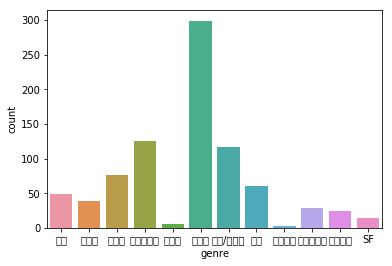

In [0]:
sns.countplot(df.genre)

In [0]:

genre_dict = dict((i,j) for i,j in zip(df.genre.value_counts().index.format(), [i for i in range(12)]))
print(genre_dict)
df.genre = df.genre.replace(genre_dict).astype('object')

{'드라마': 0, '다큐멘터리': 1, '멜로/로맨스': 2, '코미디': 3, '공포': 4, '액션': 5, '느와르': 6, '애니메이션': 7, '미스터리': 8, 'SF': 9, '뮤지컬': 10, '서스펜스': 11}


In [0]:
df.genre = df.genre.replace({11:10}).astype('object')
df.genre.value_counts()

0     299
1     126
2     117
3      76
4      61
5      49
6      39
7      29
8      24
9      14
10      9
Name: genre, dtype: int64

# 4 release_time : 개봉일

In [0]:
df["release_time_year"] = df.release_time.apply(lambda x : x[:4]).astype('object')
df["release_time_month"] = df.release_time.apply(lambda x : x[5:7]).astype('object')
train_df["release_time_year"] = train_df.release_time.apply(lambda x : x[:4]).astype('object')
train_df["release_time_month"] = train_df.release_time.apply(lambda x : x[5:7]).astype('object')
test_df["release_time_year"] = test_df.release_time.apply(lambda x : x[:4]).astype('object')
test_df["release_time_month"] = test_df.release_time.apply(lambda x : x[5:7]).astype('object')

In [0]:

del df['release_time']

In [0]:
df.release_time_year.value_counts()

2014    177
2015    171
2013    130
2010    124
2012    124
2011    117
Name: release_time_year, dtype: int64

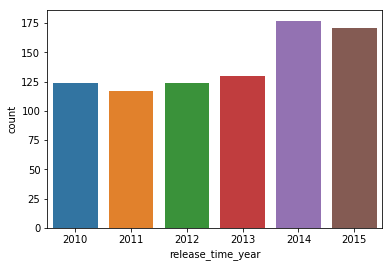

In [0]:
sns.countplot(df.release_time_year)

In [0]:
train_df.groupby(['release_time_year'])['box_off_num'].mean().astype('int')

release_time_year
2010     541658
2011     628867
2012     945725
2013    1007357
2014     593884
2015     595869
Name: box_off_num, dtype: int64

In [0]:
df.release_time_month.value_counts()

11    94
10    82
09    82
12    75
03    74
08    73
05    72
04    71
07    62
01    56
06    56
02    46
Name: release_time_month, dtype: int64

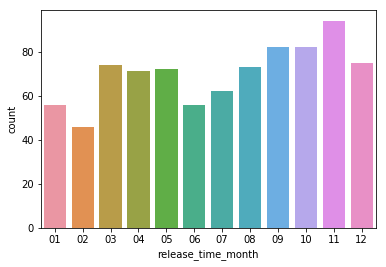

In [0]:
sns.countplot(df.release_time_month)

# 5 time : 상영시간(분)

In [0]:
import seaborn as sns

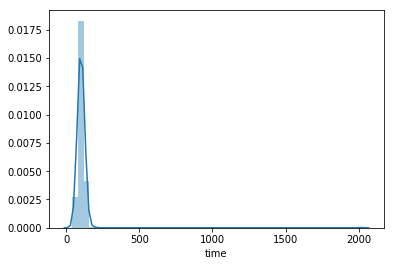

In [0]:
sns.distplot(df['time'])

In [0]:
df[df.time == df.time.max()]['title'] #이 영화가 극단값이여서 찾아보니까 오기입된 값으로 보임.

224    슈퍼레이서 엔지
Name: title, dtype: object

In [0]:
df.time = df.time.replace({2015 : df.time.mean()})

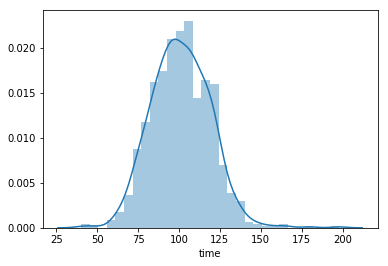

In [0]:
sns.distplot(df['time'])

# 6 screening_rat : 상영등급

In [0]:
screening_rat_dict = dict((i,j) for i,j in zip(df.screening_rat.value_counts().index.format(),
                                              [_ for _ in range(4)]))
screening_rat_dict

{'12세 관람가': 2, '15세 관람가': 1, '전체 관람가': 3, '청소년 관람불가': 0}

In [0]:
df.screening_rat = df.screening_rat.replace(screening_rat_dict).astype('object')
train_df.screening_rat = train_df.screening_rat.replace(screening_rat_dict).astype('object')
test_df.screening_rat = test_df.screening_rat.replace(screening_rat_dict).astype('object')

In [0]:
df.screening_rat.value_counts()

0    297
1    275
2    142
3    129
Name: screening_rat, dtype: int64

In [0]:
train_df.groupby(['screening_rat'])['box_off_num'].mean().astype('int')

screening_rat
0     364181
1    1247518
2     844980
3     135100
Name: box_off_num, dtype: int64

# 7 director : 감독이름

In [0]:
train_director = set(train_df.director.tolist())
test_director = set(test_df.director.tolist())
inter_director = list(train_director.intersection(test_director))
target_director = []

for di in inter_director:
    if train_df[train_df.director == di]['box_off_num'].mean() > train_df['box_off_num'].mean():
        target_director.append(di)

In [0]:
len(target_director)

24

In [0]:
director_dict = dict((i,j) for i,j in zip(target_director, [i for i in range(len(target_director))]))
director_dict

{'강우석': 0,
 '강효진': 2,
 '곽경택': 15,
 '김상만': 4,
 '김성훈': 12,
 '김정훈': 21,
 '김한민': 13,
 '김홍선': 14,
 '류승완': 6,
 '민규동': 9,
 '박훈정': 3,
 '방은진': 8,
 '윤종빈': 20,
 '이석훈': 10,
 '이재규': 1,
 '이정범': 7,
 '이준익': 22,
 '임상수': 11,
 '임순례': 17,
 '장철수': 5,
 '장훈': 18,
 '정지영': 16,
 '조범구': 19,
 '황동혁': 23}

In [0]:
df.director = df.director.replace(director_dict).apply(lambda x : x if str(x).isdigit() else len(director_dict)).astype("object")
train_df.director = train_df.director.replace(director_dict).apply(lambda x : x if str(x).isdigit() else len(director_dict)).astype("object")
test_df.director = test_df.director.replace(director_dict).apply(lambda x : x if str(x).isdigit() else len(director_dict)).astype("object")

In [0]:
df.director.value_counts().sort_index()

0       3
1       2
2       2
3       3
4       2
5       2
6       3
7       2
8       2
9       4
10      3
11      3
12      4
13      2
14      2
15      4
16      2
17      3
18      2
19      2
20      2
21      3
22      4
23      2
24    780
Name: director, dtype: int64

In [0]:
train_df.groupby('director')[
    'box_off_num'
].mean().astype('int')

director
0     2547448
1     3849696
2     1214237
3      903340
4     1208310
5     6959083
6     4944780
7     6178665
8     1854711
9     2318897
10    8212959
11    1716802
12    1728739
13    7482180
14    1646142
15    1835873
16    3460212
17     885638
18    2945151
19    3566844
20    4720050
21    1314509
22    1550716
23    8659725
24     557955
Name: box_off_num, dtype: int64

# 8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

In [0]:
df.dir_prev_bfnum.isnull().sum()

466

In [0]:
df[df.dir_prev_num == 0].shape

(466, 13)

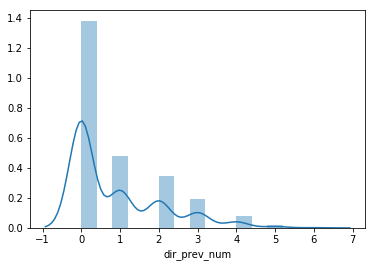

In [0]:
sns.distplot(df.dir_prev_num)

In [0]:
df.dir_prev_bfnum = df.dir_prev_bfnum.fillna(0)

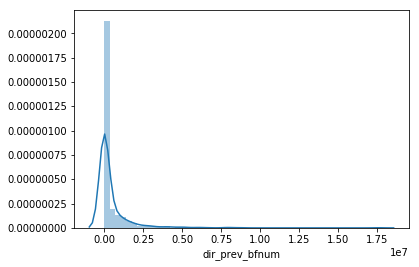

In [0]:
sns.distplot(df.dir_prev_bfnum)

# 10 num_staff : 스텝수
# 11 num_actor : 주연배우수

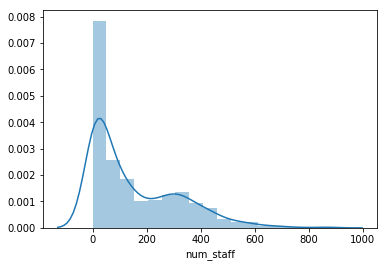

In [0]:
sns.distplot(df.num_staff)

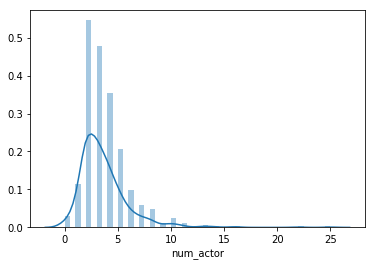

In [0]:
sns.distplot(df.num_actor)

# 12 box_off_num : 관객수

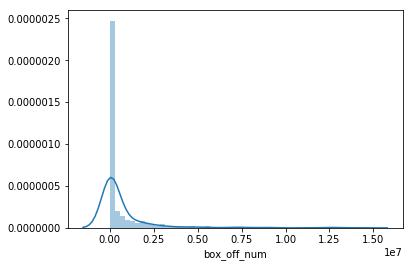

In [0]:
sns.distplot(train_df.box_off_num)

# 모델링

- 1. 선형회귀분석
- 2. Lidge
- 3. ,Lasso
- 4. 의사결정나무
- 5. 랜덤포레스트

In [0]:
train_df, test_df = df.iloc[:600], df.iloc[600:]
train_df.shape, test_df.shape

((600, 13), (243, 13))

In [0]:
X = train_df.drop(columns=['title', 
                          'box_off_num'], axis = 1)
y = train_df.box_off_num.astype('float64')

In [0]:
dummy_X = pd.get_dummies(X[X.dtypes[X.dtypes == 'object'].index.format()])
not_dummy_X = X.drop(columns=X.dtypes[X.dtypes == 'object'].index.format()).astype('float64')
X = pd.concat([dummy_X, not_dummy_X], axis = 1)
X.shape

(600, 72)

In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
estimator1 = LinearRegression(n_jobs=-1)
estimator2 = Ridge()
estimator3 = Lasso()
estimator4 = DecisionTreeRegressor()
estimator5 = RandomForestRegressor(n_jobs=-1)

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [0]:
estimators = [estimator1, estimator2, estimator3, estimator4,
             estimator5]

for estimator in estimators:
    print(np.sqrt(np.abs(cross_val_score(estimator, X, y, cv=10, scoring='neg_mean_squared_error'))).mean())

1405613.6760848013
1381879.6786826532
1424402.6173869171
2031065.7991913236
1437111.408595563


# 제출용

In [0]:
del test_df['title']
del test_df['box_off_num']

In [0]:
testdummy_X = pd.get_dummies(test_df[['distributor', 'genre', 'screening_rat', 'release_time_year', 'release_time_month', 'director']])
testnot_dummy_X = test_df.drop(columns=['distributor', 'genre', 'screening_rat', 'release_time_year', 'release_time_month','director']).astype('float64')
X_test = pd.concat([testdummy_X, testnot_dummy_X], axis = 1)

In [0]:
X.shape, X_test.shape

((600, 72), (243, 72))

In [0]:
estimator1 = LinearRegression(n_jobs=-1)
estimator2 = Ridge()
estimator3 = Lasso()
estimator4 = DecisionTreeRegressor()
estimator5 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

estimators = [estimator1, estimator2, estimator3, estimator4, estimator5]

In [0]:
all_y_pred = np.zeros(shape = (len(X_test), 6))
for index, estimator in enumerate(estimators):
  estimator.fit(X, y)
  all_y_pred[:, index] = estimator.predict(X_test)

In [0]:
download = drive.CreateFile({"id": "11spU5V4MKwBuRXNh6IMVQmq_KxZq5Dg6"}) #이부분 수정하면 됩니당
download.GetContentFile("submission.csv")
from google.colab import files

In [0]:
submit = pd.read_csv("submission.csv")
for i in range(len(estimators)):
  submit['box_off_num'] = all_y_pred[:,i]
  submit.to_csv("submit" + str(i) + ".csv", index = False, encoding='utf-8-sig')
  files.download("submit" + str(i) + ".csv")